<a href="https://colab.research.google.com/github/GonzaOrtiz020/Open-Data/blob/main/Proyecto_Open_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Subida y limpieza de CSV

In [20]:
import pandas as pd
import numpy as np
import re
import nltk
from google.colab import files
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from sklearn.preprocessing import MinMaxScaler, Binarizer, StandardScaler
import matplotlib.pyplot as plt
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
from IPython.display import display

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

Limpieza de campos y delimitadores

In [21]:
# Función para cargar y limpiar el CSV
def load_and_clean_csv(file_path):
    # Leer todas las líneas del archivo
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()

    # Verificar el número de campos en la primera línea (encabezado)
    num_fields = len(lines[0].split(';'))

    corrected_lines = []
    for line in lines:
        fields = line.split(';')
        if len(fields) == num_fields:
            corrected_lines.append(line)

    # Convertir las líneas corregidas en un DataFrame
    from io import StringIO
    corrected_data = StringIO('\n'.join(corrected_lines))

    # Leer el archivo CSV
    data = pd.read_csv(corrected_data, delimiter=';', encoding='utf-8')

    # Verificar si hay una columna no deseada (por ejemplo, un índice)
    if 'Unnamed: 0' in data.columns:
        data = data.drop(columns=['Unnamed: 0'])

    # Verificar que el número de columnas coincida con los nombres de las columnas esperados
    expected_columns = ['Codigo', 'Nombre del Proyecto', 'Institucion', 'Estado', 'Modalidad', 'Rendiciones Verificadas']
    if len(data.columns) == len(expected_columns):
        data.columns = expected_columns
    else:
        raise ValueError(f"Number of columns in data ({len(data.columns)}) does not match expected number ({len(expected_columns)})")

    return data

# Cargar el archivo CSV desde la computadora
uploaded = files.upload()

# Obtener el nombre del archivo subido
file_path = next(iter(uploaded))

# Limpiar el archivo CSV
cleaned_data = load_and_clean_csv(file_path)

Saving Datos Proyectos.csv to Datos Proyectos.csv


Valores duplicados y nulos

In [22]:
# Detectar valores duplicados en el CSV
print(f'Valores duplicados en el CSV: {cleaned_data.duplicated().sum()}')

# Encontrar valores nulos en el CSV
print(f'Valores nulos en el CSV:\n{cleaned_data.isnull().sum()}')

# Eliminar la columna 'Rendiciones Verificadas'
cleaned_data = cleaned_data.drop(columns=['Rendiciones Verificadas'])

# Eliminar filas con valores nulos en la columna 'Estado'
cleaned_data = cleaned_data.dropna(subset=['Estado'])

# Eliminar filas con valores nulos en la columna 'Modalidad'
cleaned_data = cleaned_data.dropna(subset=['Modalidad'])

# Guardar las modificaciones en el archivo original
cleaned_data.to_csv(file_path, sep=';', index=False, encoding='utf-8-sig')

Valores duplicados en el CSV: 0
Valores nulos en el CSV:
Codigo                        0
Nombre del Proyecto           0
Institucion                   0
Estado                      260
Modalidad                     1
Rendiciones Verificadas    1157
dtype: int64


# Técnicas de análisis descriptivo

Descripción de los datos

In [23]:
# Información básica sobre los datos
print(cleaned_data.info())

# Resumen estadístico de los datos
display(cleaned_data.describe())

# Verificar los tipos de datos
print(f'Tipos de datos:\n{cleaned_data.dtypes}')

<class 'pandas.core.frame.DataFrame'>
Index: 896 entries, 0 to 1156
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Codigo               896 non-null    object
 1   Nombre del Proyecto  896 non-null    object
 2   Institucion          896 non-null    object
 3   Estado               896 non-null    object
 4   Modalidad            896 non-null    object
dtypes: object(5)
memory usage: 42.0+ KB
None


,Codigo,Nombre del Proyecto,Institucion,Estado,Modalidad
count,896,896,896,896,896
unique,896,895,163,4,20
top,14-POS-009,Oficina de Transferencia de Tecnología y Resul...,Facultad de Ciencias Exactas y Naturales - FAC...,Finalizado,Proyectos de Investigación Institucional
freq,1,2,59,807,216


Tipos de datos:
Codigo                 object
Nombre del Proyecto    object
Institucion            object
Estado                 object
Modalidad              object
dtype: object


Distribución de Valores

Distribución de valores en la columna 'Institucion':


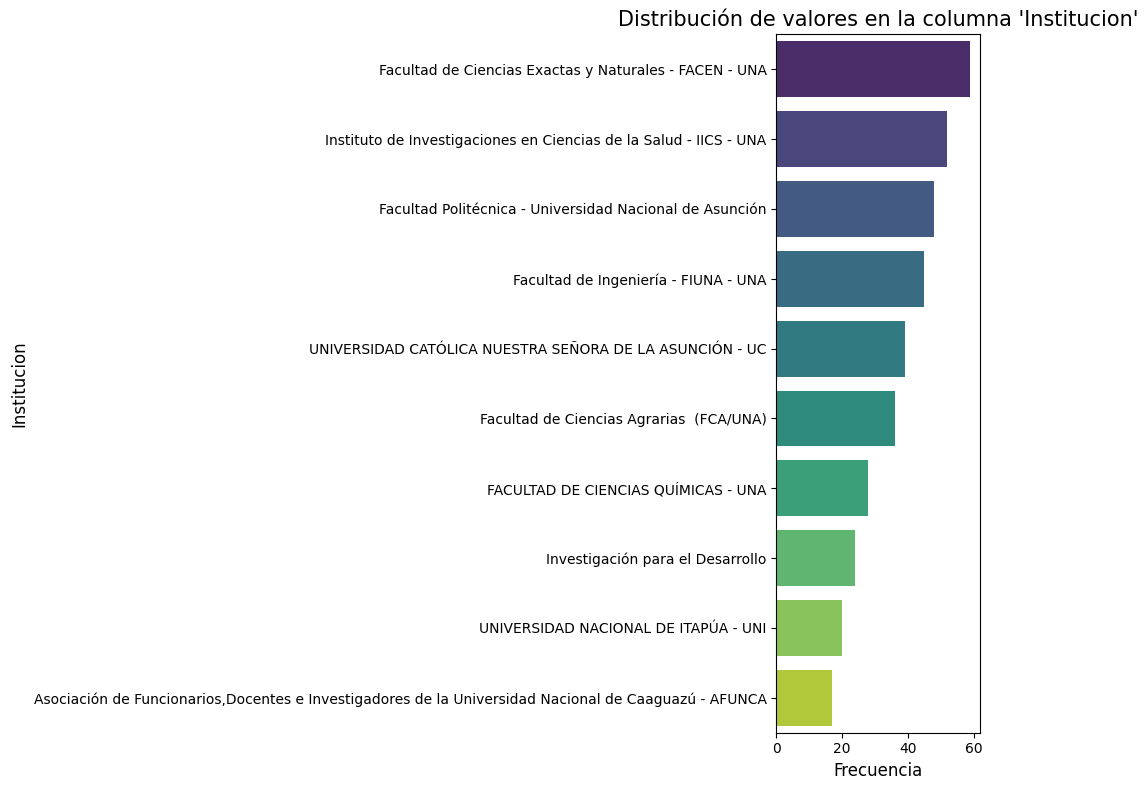

Distribución de valores en la columna 'Estado':


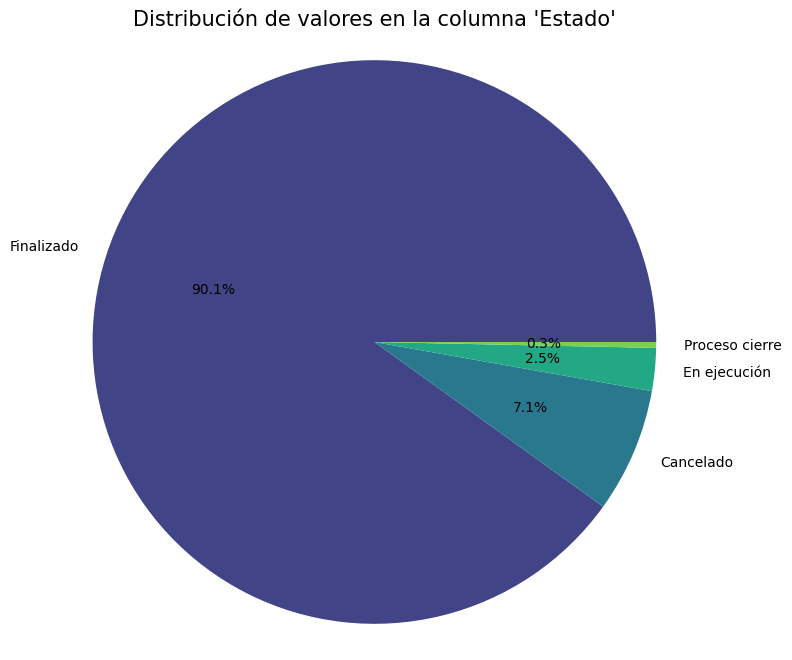

Distribución de valores en la columna 'Modalidad':


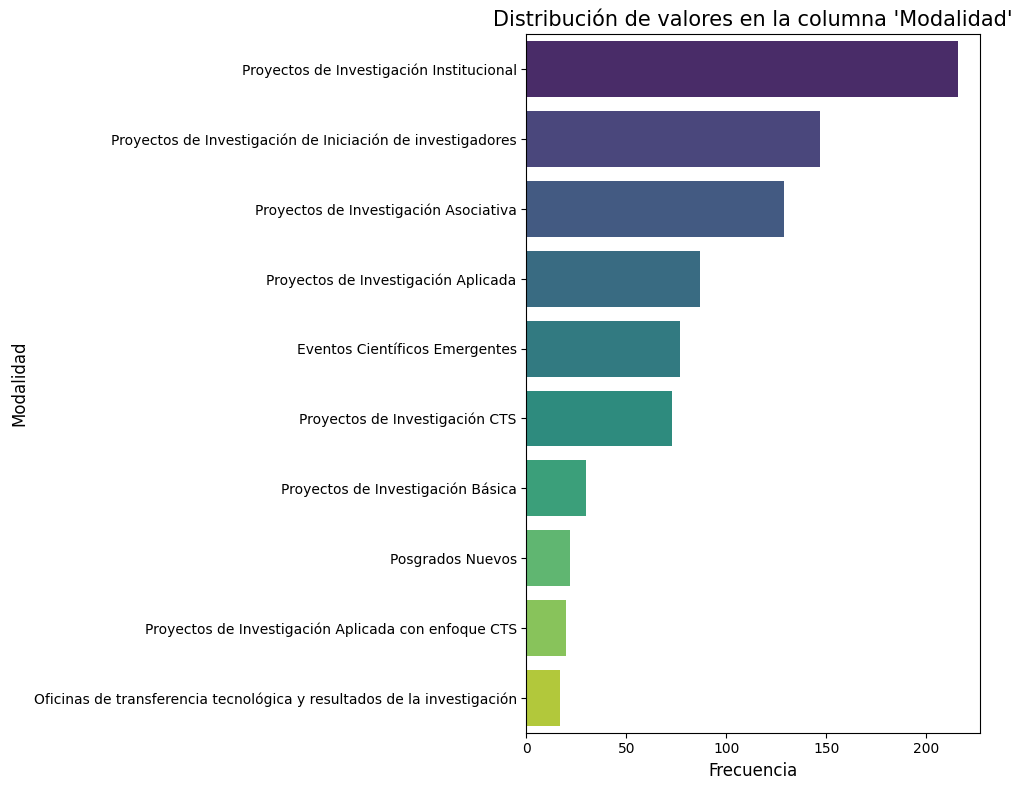

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Columnas específicas para graficar
columns_to_plot = ['Institucion', 'Estado', 'Modalidad']

for column in columns_to_plot:
    if column in ['Institucion', 'Modalidad']:
        print(f"Distribución de valores en la columna '{column}':")
        value_counts = cleaned_data[column].value_counts().head(10)  # Mostrar solo el top 10 de valores

        # Crear un gráfico de barras horizontal para la columna
        plt.figure(figsize=(10, 8))
        sns.barplot(y=value_counts.index, x=value_counts.values, hue=value_counts.index, dodge=False, palette='viridis', legend=False)
        plt.title(f"Distribución de valores en la columna '{column}'", fontsize=15)
        plt.xlabel('Frecuencia', fontsize=12)
        plt.ylabel(column, fontsize=12)
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)
        plt.tight_layout()
        plt.show()

    elif column == 'Estado':
        print(f"Distribución de valores en la columna '{column}':")
        value_counts = cleaned_data[column].value_counts()  # Mostrar todos los valores

        # Crear un gráfico circular para la columna
        plt.figure(figsize=(8, 8))
        plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis', len(value_counts)))
        plt.title(f"Distribución de valores en la columna '{column}'", fontsize=15)
        plt.axis('equal')
        plt.show()

Filtrado de datos

In [25]:
print("Dimensiones del DataFrame:", cleaned_data.shape)

Dimensiones del DataFrame: (896, 5)


In [26]:
print("Tipos de datos:")
print(cleaned_data.dtypes)

Tipos de datos:
Codigo                 object
Nombre del Proyecto    object
Institucion            object
Estado                 object
Modalidad              object
dtype: object


In [27]:
# Resumen estadístico de los datos
def resumen_estadistico(df):
    resumen = df.describe(include='all').transpose()
    resumen['missing_values'] = df.isnull().sum()
    resumen['unique_values'] = df.nunique()
    return resumen

resumen_datos = resumen_estadistico(cleaned_data)

print("Resumen estadístico de los datos:")
display(resumen_datos)

Resumen estadístico de los datos:


,count,unique,top,freq,missing_values,unique_values
Codigo,896,896,14-POS-009,1,0,896
Nombre del Proyecto,896,895,Oficina de Transferencia de Tecnología y Resul...,2,0,895
Institucion,896,163,Facultad de Ciencias Exactas y Naturales - FAC...,59,0,163
Estado,896,4,Finalizado,807,0,4
Modalidad,896,20,Proyectos de Investigación Institucional,216,0,20


In [28]:
from IPython.display import display
# Filtrar datos según la condición 'Estado' igual a 'Finalizado'
finalizados = cleaned_data[cleaned_data['Estado'] == 'Finalizado']
print("Datos con 'Estado' igual a 'Finalizado':")
display(finalizados.head())

# Filtrar datos según la condición 'Modalidad' no nula
modalidad_no_nula = cleaned_data[cleaned_data['Modalidad'].notna()]
print("Datos con 'Modalidad' no nula:")
display(modalidad_no_nula.head())

# Filtrar datos según la condición 'Institucion' que contenga 'UNIVERSIDAD NACIONAL DE ASUNCIÓN'
institucion_una = cleaned_data[cleaned_data['Institucion'].str.contains('UNIVERSIDAD NACIONAL DE ASUNCIÓN', case=False, na=False)]
print("Datos con 'Institucion' que contiene 'UNIVERSIDAD NACIONAL DE ASUNCIÓN':")
display(institucion_una.head())

Datos con 'Estado' igual a 'Finalizado':


,Codigo,Nombre del Proyecto,Institucion,Estado,Modalidad
1,14-INV-468,CROSS MATCH VIRTUAL POR LUMINEX EN INSUFICIENT...,Laboratorio Curie S.R.L,Finalizado,Proyectos de Investigación CTS
2,14-INV-111,Conocimientos espidemiológicos de enfermedade...,UNIVERSIDAD NACIONAL DE ITAPÚA - UNI,Finalizado,Proyectos de Investigación Institucional
3,14-INV-466,Déficit e insuficencia de Vitamina D y su pape...,Laboratorio Curie S.R.L,Finalizado,Proyectos de Investigación CTS
4,14-INV-345,WEPI - Herramienta de Procesamiento Digital de...,Facultad Politécnica - Universidad Nacional de...,Finalizado,Proyectos de Investigación de Iniciación de in...
5,14-INV-291,Dispositivo innovador para la realización de e...,UNIVERSIDAD CATÓLICA NUESTRA SEÑORA DE LA ASUN...,Finalizado,Proyectos de Investigación Institucional


Datos con 'Modalidad' no nula:


,Codigo,Nombre del Proyecto,Institucion,Estado,Modalidad
0,14-POS-009,Maestría en Ingeniería Vial,UNIVERSIDAD CATÓLICA NUESTRA SEÑORA DE LA ASUN...,Cancelado,Posgrados apoyado por el CONACYT
1,14-INV-468,CROSS MATCH VIRTUAL POR LUMINEX EN INSUFICIENT...,Laboratorio Curie S.R.L,Finalizado,Proyectos de Investigación CTS
2,14-INV-111,Conocimientos espidemiológicos de enfermedade...,UNIVERSIDAD NACIONAL DE ITAPÚA - UNI,Finalizado,Proyectos de Investigación Institucional
3,14-INV-466,Déficit e insuficencia de Vitamina D y su pape...,Laboratorio Curie S.R.L,Finalizado,Proyectos de Investigación CTS
4,14-INV-345,WEPI - Herramienta de Procesamiento Digital de...,Facultad Politécnica - Universidad Nacional de...,Finalizado,Proyectos de Investigación de Iniciación de in...


Datos con 'Institucion' que contiene 'UNIVERSIDAD NACIONAL DE ASUNCIÓN':


,Codigo,Nombre del Proyecto,Institucion,Estado,Modalidad
4,14-INV-345,WEPI - Herramienta de Procesamiento Digital de...,Facultad Politécnica - Universidad Nacional de...,Finalizado,Proyectos de Investigación de Iniciación de in...
32,14-INV-344,Análisis e implementacion práctica de modelos ...,Facultad Politécnica - Universidad Nacional de...,Finalizado,Proyectos de Investigación de Iniciación de in...
43,14-INV-396,Desarrollo de sistema alternativo de comunicac...,Facultad Politécnica - Universidad Nacional de...,Finalizado,Proyectos de Investigación de Iniciación de in...
44,14-INV-394,Red inalámbrica de sensores medioambientales,Facultad Politécnica - Universidad Nacional de...,Finalizado,Proyectos de Investigación de Iniciación de in...
46,14-INV-329,Modernización de Gammacamaras,Facultad Politécnica - Universidad Nacional de...,Finalizado,Proyectos de Investigación de Iniciación de in...


Correlación entre variables

In [29]:
# Convertir columnas categóricas a numéricas para el análisis de correlación
from sklearn.preprocessing import LabelEncoder

# Crear una copia del DataFrame limpio para el análisis de correlación
cleaned_data_for_corr = cleaned_data.copy()

# Crear un diccionario para almacenar los codificadores de etiquetas
label_encoders = {}

# Convertir las columnas categóricas a numéricas
categorical_columns = ['Institucion', 'Estado', 'Modalidad']
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    cleaned_data_for_corr[column] = label_encoders[column].fit_transform(cleaned_data_for_corr[column])

# Verificar los tipos de datos y eliminar cualquier columna no numérica restante
for column in cleaned_data_for_corr.columns:
    if cleaned_data_for_corr[column].dtype == 'object':
        print(f"Eliminando columna no numérica: {column}")
        cleaned_data_for_corr = cleaned_data_for_corr.drop(columns=[column])

# Mostrar las primeras filas del DataFrame limpio y numérico para el análisis de correlación
cleaned_data_for_corr.head()

Eliminando columna no numérica: Codigo
Eliminando columna no numérica: Nombre del Proyecto


,Institucion,Estado,Modalidad
0,135,0,9
1,111,2,15
2,139,2,16
3,111,2,15
4,60,2,17


# Visualización de Resultados

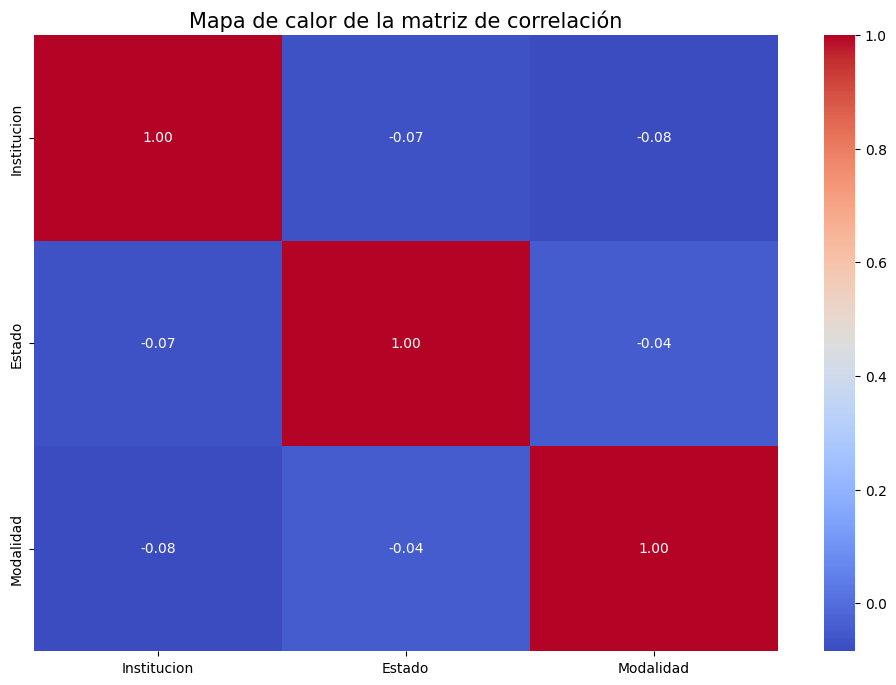

In [30]:
# Calcular la matriz de correlación
correlation_matrix = cleaned_data_for_corr.corr(method='pearson')

# Crear un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de calor de la matriz de correlación', fontsize=15)
plt.show()